In [1]:
import numpy as np 
import random
import pandas as pd

##Погода

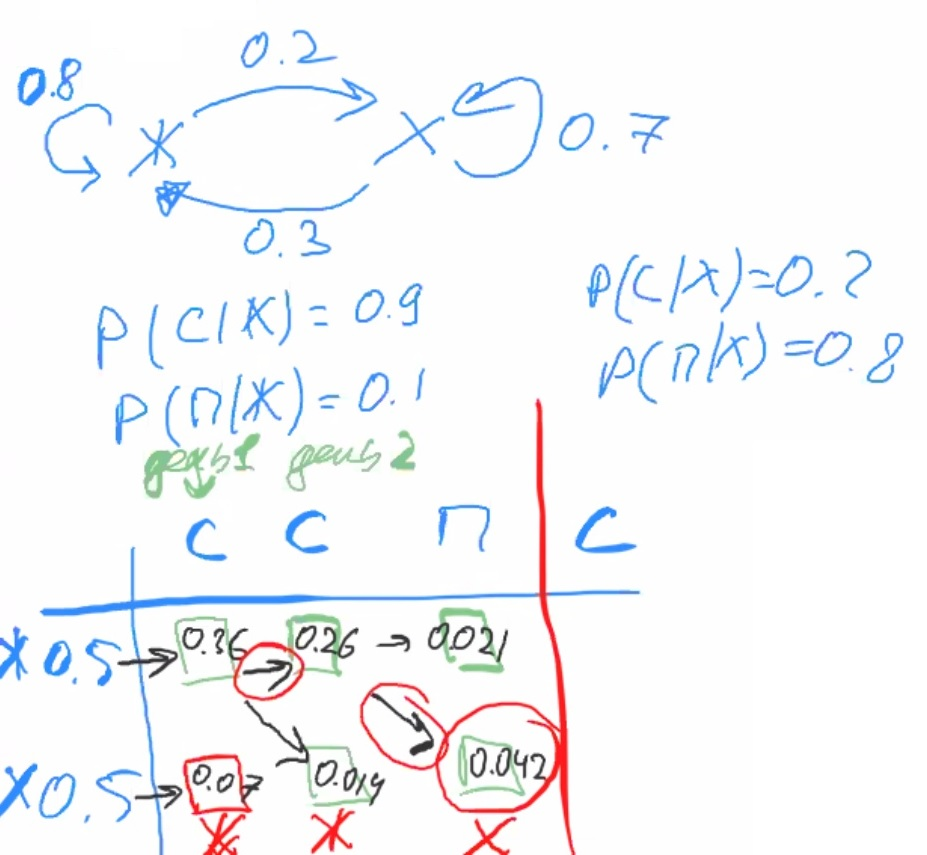

In [131]:
zh = 0.2
hz = 0.3
hh = 0.7
zz = 0.8

In [132]:
Soln = [0.9, 0.2]
Pasm = [0.1, 0.8]

In [133]:
SolnZhar = 0.9
PasmZhar = 0.1
SolnHol = 0.2
PasmHol = 0.8

In [134]:
pogoda =  "SSPS"

In [135]:
tablans = np.zeros((2,len(pogoda)))

In [136]:
tablans

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [137]:
way = []
Z0 = 0.5
H0 = 0.5

for i in range(len(pogoda)):
  if pogoda[i] == 'S':
    maintemp = Soln
  if pogoda[i] == 'P':
    maintemp = Pasm  
  
  temp1 = Z0 * zz * maintemp[0]    
  temp11 = H0 * hz * maintemp[0]
  temp2 = Z0 * zh * maintemp[1]
  temp21 = H0 * hh * maintemp[1]
  tablans[0,i] = max(temp1,temp11)
  tablans[1,i] = max(temp2,temp21)
  if (tablans[0,i] > tablans[1,i]):
    way.append('Z')
  else:
    way.append('H')
  Z0 = tablans[0,i]
  H0 = tablans[1,i] 

In [138]:
pd.DataFrame(tablans)

,0,1,2,3
0,0.36,0.2592,0.020736,0.014930
1,0.07,0.0144,0.041472,0.005806


In [139]:
way

['Z', 'Z', 'H', 'Z']

##Дальше - больше

In [152]:
random.seed(322)
tableanspog = np.zeros((4,4))
for i in range(4):
  ver = 1
  for j in range(4):
    if (j == 3):
      tableanspog[i,j] = ver
    if (j != 3):
      tableanspog[i,j] = random.uniform(0,ver)
    ver = ver - tableanspog[i,j]

Матрица переходов 

In [153]:
tableanspog

array([[0.87353445, 0.10294061, 0.00987768, 0.01364726],
       [0.06427212, 0.26461652, 0.66543594, 0.00567541],
       [0.15535947, 0.15763851, 0.37495419, 0.31204782],
       [0.8075513 , 0.04332487, 0.03465064, 0.11447319]])

In [154]:
random.seed(322)
tablepogoda = np.zeros((4,3))
for i in range(4):
  ver = 1
  for j in range(3):
    if (j == 2):
      tablepogoda[i,j] = ver
    if (j != 2):
      tablepogoda[i,j] = random.uniform(0,ver)
    ver = ver - tablepogoda[i,j]

Таблица трех признаков ( условно: снег, дождь, град )

In [155]:
tablepogoda

array([[0.87353445, 0.10294061, 0.02352494],
       [0.41988128, 0.03728546, 0.54283326],
       [0.28279218, 0.71114258, 0.00606524],
       [0.15535947, 0.15763851, 0.68700202]])

In [156]:
tablepogoda[:,0]

array([0.87353445, 0.41988128, 0.28279218, 0.15535947])

In [157]:
PogodaNew = '220020'

In [158]:
tablanspog = np.zeros((4,len(PogodaNew)))
A0 = 1/4
B0 = 1/4
C0 = 1/4
D0 = 1/4
waynew = []
for i in range(len(PogodaNew)):
  if PogodaNew[i] == '0':
    maintemp = tablepogoda[:,0]
  if PogodaNew[i] == '1':
    maintemp = tablepogoda[:,1] 
  if PogodaNew[i] == '2':
    maintemp= tablepogoda[:,2]

  tablanspog[0,i] = max(maintemp[0] * A0  * tableanspog[0,0], maintemp[0] * B0 * tableanspog[1,0], maintemp[0] * C0  * tableanspog[2,0], maintemp[0] * D0 * tableanspog[3,0] )
  tablanspog[1,i] = max(maintemp[1] * A0  * tableanspog[0,1], maintemp[1] * B0 * tableanspog[1,1], maintemp[1] * C0  * tableanspog[2,1], maintemp[1] * D0 * tableanspog[3,1] )
  tablanspog[2,i] = max(maintemp[2] * A0  * tableanspog[0,2], maintemp[2] * B0 * tableanspog[1,2], maintemp[2] * C0  * tableanspog[2,2], maintemp[2] * D0 * tableanspog[3,2] )
  tablanspog[3,i] = max(maintemp[3] * A0  * tableanspog[0,3], maintemp[3] * B0 * tableanspog[1,3], maintemp[3] * C0  * tableanspog[2,3], maintemp[3] * D0 * tableanspog[3,3] )

  if (tablanspog[0,i] == max(tablanspog[0,i],tablanspog[1,i],tablanspog[2,i],tablanspog[3,i])):
    waynew.append('A')
  if (tablanspog[1,i] == max(tablanspog[0,i],tablanspog[1,i],tablanspog[2,i],tablanspog[3,i])):
    waynew.append('B')
  if (tablanspog[2,i] == max(tablanspog[0,i],tablanspog[1,i],tablanspog[2,i],tablanspog[3,i])):
    waynew.append('C')
  if (tablanspog[3,i] == max(tablanspog[0,i],tablanspog[1,i],tablanspog[2,i],tablanspog[3,i])):
    waynew.append('D')

  A0 = tablanspog[0,i]
  B0 = tablanspog[1,i]
  C0 = tablanspog[2,i]
  D0 = tablanspog[3,i]

In [159]:
waynew

['D', 'B', 'A', 'A', 'B', 'A']

In [160]:
tablanspog

array([[5.13746088e-03, 1.01816410e-03, 2.97324801e-03, 2.26877389e-03,
        4.66229484e-05, 3.55762209e-05],
       [3.59106624e-02, 5.15830270e-03, 5.73126239e-04, 1.28512206e-04,
        1.26778146e-04, 1.40860059e-05],
       [1.00900719e-03, 1.44936466e-04, 9.70689802e-04, 1.07850940e-04,
        5.18678960e-07, 2.38571214e-05],
       [5.35943714e-02, 4.21483889e-03, 7.49587779e-05, 4.70586389e-05,
        2.31208133e-05, 4.11191972e-07]])

In [161]:
pd.DataFrame(tablanspog)

,0,1,2,3,4,5
0,0.005137,0.001018,0.002973,0.002269,4.662295e-05,3.557622e-05
1,0.035911,0.005158,0.000573,0.000129,1.267781e-04,1.408601e-05
2,0.001009,0.000145,0.000971,0.000108,5.186790e-07,2.385712e-05
3,0.053594,0.004215,0.000075,0.000047,2.312081e-05,4.111920e-07


##Оптимизировано

In [140]:
print('Введите количество состояний')
sost = int(input())

Введите количество состояний
4


In [141]:
print('Введите количество признаков')
priz = int(input())

Введите количество признаков
3


In [142]:
random.seed(322)
tableanspogopt = np.zeros((sost,sost))
for i in range(sost):
  ver = 1
  for j in range(sost):
    if (j == sost-1):
      tableanspogopt[i,j] = ver
    if (j != sost-1):
      tableanspogopt[i,j] = random.uniform(0,ver)
    ver = ver - tableanspogopt[i,j]

In [143]:
tableanspogopt

array([[0.87353445, 0.10294061, 0.00987768, 0.01364726],
       [0.06427212, 0.26461652, 0.66543594, 0.00567541],
       [0.15535947, 0.15763851, 0.37495419, 0.31204782],
       [0.8075513 , 0.04332487, 0.03465064, 0.11447319]])

In [144]:
random.seed(322)
tablepogodaopt = np.zeros((sost,priz))
for i in range(sost):
  ver = 1
  for j in range(priz):
    if (j == priz-1):
      tablepogodaopt[i,j] = ver
    if (j != priz-1):
      tablepogodaopt[i,j] = random.uniform(0,ver)
    ver = ver - tablepogodaopt[i,j]

In [145]:
tablepogodaopt

array([[0.87353445, 0.10294061, 0.02352494],
       [0.41988128, 0.03728546, 0.54283326],
       [0.28279218, 0.71114258, 0.00606524],
       [0.15535947, 0.15763851, 0.68700202]])

In [146]:
PogodaOpt = ''
for i in range(random.randint(2,6)):
  PogodaOpt = PogodaOpt + str(random.randint(0,priz-1))

In [147]:
PogodaOpt

'220020'

In [148]:
ZeroSost = np.full(sost,1/sost)
Ans = np.zeros((sost,len(PogodaOpt)))
Main = np.zeros((sost,sost))
wayopt = []
for i in range(len(PogodaOpt)):
  for j in range(priz):
    if (PogodaOpt[i] == str(j)):
      maintempopt = tablepogodaopt[:,j]  
  for j in range(sost):
    for k in range(sost):
      Main[j,k] = (maintempopt[j] * ZeroSost[k] * tableanspogopt[k,j])
  ZeroSost = []
  for u in range(sost):
    Ans[u,i] = max(Main[u,:])
    ZeroSost.append(Ans[u,i])
  wayopt.append(np.argmax(Ans[:,i]))


In [149]:
pd.DataFrame(Ans)

,0,1,2,3,4,5
0,0.005137,0.001018,0.002973,0.002269,4.662295e-05,3.557622e-05
1,0.035911,0.005158,0.000573,0.000129,1.267781e-04,1.408601e-05
2,0.001009,0.000145,0.000971,0.000108,5.186790e-07,2.385712e-05
3,0.053594,0.004215,0.000075,0.000047,2.312081e-05,4.111920e-07


In [150]:
for i in range(len(wayopt)):
  if wayopt[i] == 0:
    wayopt[i] = 'A'
  if wayopt[i] == 1:
    wayopt[i] = 'B'
  if wayopt[i] == 2:
    wayopt[i] = 'C'
  if wayopt[i] == 3:
    wayopt[i] = 'D'
  if wayopt[i] == 4:
    wayopt[i] = 'E'

In [151]:
wayopt

['D', 'B', 'A', 'A', 'B', 'A']